In [237]:
#Question we are asking is stacking effiencey( starting 2 players on same team)
#Stacking and portfolio, aim to diversify.
#To increase returns, you need to increase risk exposure
#Example is starting Will Fuller or Jmes White. Will has high injury risk but high upside
#James White has his lower upside but lower risk of injury.

import pandas as pd 
import numpy as np #lIBRARY THAT ALLOWS US TO USE ARRAYS
import seaborn as sns
from matplotlib import pyplot as plt


In [238]:
df=pd.read_csv("2019.csv")

In [239]:
#droping unnecessary columns
df.drop(["Rk","2PM","2PP","FantPt","DKPt","FDPt","VBD","PosRank","OvRank","PPR","Fmb","GS","Age","Tgt","Y/A","Att","Att.1","Cmp","Y/R"], axis=1, inplace=True)


In [240]:
#fixing name formatting
df["Player"]=df["Player"].apply(lambda x: x.split("*")[0]).apply(lambda x: x.split("\\")[0])

In [241]:
#rename columns
df.rename({
    "TD":"PassingTD",
    "TD.1":"RushingTD",
    "TD.2":"ReceivingTD",
    "TD.3":"TotalTD",
    "Yds":"PassingYDs",
    "Yds.1":"RushingYDs",
    "Yds.2":"ReceivingYDs",
}, axis=1, inplace=True)



In [242]:
#Calculating FantasyPoints
df["FantasyPoints"]=(df["PassingYDs"]*0.04 +df["Rec"] + df["PassingTD"]*4 -df["Int"]*2+df["RushingYDs"]*.1 +df["RushingTD"]*6 +df["ReceivingYDs"]*.1+df["ReceivingTD"]*6 -df["FL"]*2)

In [243]:
#FantasyPoints per game
df["FantasyPoints/GM"]=df["FantasyPoints"]/df["G"]

In [244]:
#Dataframe
#!= is not equal to or False
#dropping players who played for two or more teams
#syntax df=df[boolean_expression] almost always the same
df=df[df["Tm"] != "2TM"]
df=df[df["Tm"] != "3TM"]



In [245]:
#Another dataframe
#Filtering our dataframe to only include this 4 
df=df[["Tm","FantPos","FantasyPoints","FantasyPoints/GM"]]
df.head()

,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,CAR,RB,469.20,29.32500
1,BAL,QB,415.68,27.71200
2,TEN,RB,294.60,19.64000
3,GNB,RB,314.80,19.67500
4,DAL,RB,311.70,19.48125


In [246]:
#Setting next part of program, spliting dataframe by position
#Portion dataframes based off of positions again
#Admits that this was extra in Usage vs Efficiency
#Needed, however,for this project
rb_df=df[df["FantPos"]=="RB"]
qb_df=df[df["FantPos"]=="QB"]
wr_df=df[df["FantPos"]=="WR"]
te_df=df[df["FantPos"]=="TE"]

#At this point, it was suggested to test out rb_df.head(),wr_df.head(),etc;
#Check to see if program is on point

wr_df.head()

,Tm,FantPos,FantasyPoints,FantasyPoints/GM
6,NOR,WR,374.6,23.412500
14,TAM,WR,274.1,19.578571
19,DET,WR,248.0,15.500000
25,LAR,WR,270.5,16.906250
26,ATL,WR,274.1,18.273333


In [247]:
#Begin setting up heat map
#Goal is to find the correlation coefficients between QB1, RB1, etc;
#Finding the QB1, RB1, RB2 for each team based off Fantasy Points
#Use FantasyPoints/GM value to determine the final correlation nubers
examp_column_names=["QB1", "RB1","RB2","WR1","WR2","WR3","TE"]
df.head()

,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,CAR,RB,469.20,29.32500
1,BAL,QB,415.68,27.71200
2,TEN,RB,294.60,19.64000
3,GNB,RB,314.80,19.67500
4,DAL,RB,311.70,19.48125


In [248]:
random_numbers=np.random.randn(10,7)

In [249]:
example_df = pd.DataFrame(random_numbers, columns=examp_column_names)


In [250]:
#Creation of final DataFrame
#What we are going to d is have 7 seperate DF and concatenate them based on common index

def get_top_players(df, n):
  return df.groupby("Tm").apply(lambda x: x.nlargest(n, ["FantasyPoints"]).min()).reset_index(drop=True)
#Passing an argument of a DF then use groupby which allows us to group DF based on some column
#Here, we are grouping by "Tm" in order to evaluate QB1, RB1;
#Groupby allows us to apply a function across each and every group, much like .apply()
#We use .apply to run function across our groups
#nlargest method returns the top n largest values
#For example, if n=3, it will return the top  values based on argument given -n and column value
#3 stands for top  receivers or running backs
#.min()  returns the smallest vlaue in a given group or row
#.reset_index(drop=True) is simply to reverse the indexing changes we made with groupby
#Don't know what this means but groupby created an index column for us when we used it
df.head()

,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,CAR,RB,469.20,29.32500
1,BAL,QB,415.68,27.71200
2,TEN,RB,294.60,19.64000
3,GNB,RB,314.80,19.67500
4,DAL,RB,311.70,19.48125


In [251]:
#Using above cell 
qb_df=get_top_players(qb_df,1)
te_df=get_top_players(te_df,1)
rb1_df=get_top_players(rb_df,1)
rb2_df=get_top_players(rb_df,2)
wr1_df=get_top_players(wr_df,1)
wr2_df=get_top_players(wr_df,2)
wr3_df=get_top_players(wr_df,3)
df.head()



,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,CAR,RB,469.20,29.32500
1,BAL,QB,415.68,27.71200
2,TEN,RB,294.60,19.64000
3,GNB,RB,314.80,19.67500
4,DAL,RB,311.70,19.48125


In [252]:
#Small detail but if your going to ""  a dict, do it for every word, otherwise
#The code won't work
#Example is in next cell as to why it won't work
#new_df.rename({"FantasyPoints/GM": name}, axis=1, inplace=True)
new_names = {
    "QB1":qb_df,
    "TE1":te_df,
    "RB1":rb1_df,
    "RB2":rb2_df,
    "WR1":wr1_df,
    "WR2":wr2_df,
    "WR3":wr3_df

}
#Dictionary to help us add those column names
df.head()


,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,CAR,RB,469.20,29.32500
1,BAL,QB,415.68,27.71200
2,TEN,RB,294.60,19.64000
3,GNB,RB,314.80,19.67500
4,DAL,RB,311.70,19.48125


In [253]:
#item() dcitonary method to iterate over our dictionary of dataframe
#We are renaming FantasyPoints/GM column, setting axis=1
#Tells pandas we want to commit the change on the column axis
#inplace=Truen to save our changes as permanent
#referencing back to set_index()
for name, new_df in new_names.items():
  new_df.rename({"FantasyPoints/GM": name}, axis=1, inplace=True)
  new_df.drop(['FantPos','FantasyPoints'], axis=1, inplace=True)
  new_df.set_index("Tm", inplace=True)
df.head()




,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,CAR,RB,469.20,29.32500
1,BAL,QB,415.68,27.71200
2,TEN,RB,294.60,19.64000
3,GNB,RB,314.80,19.67500
4,DAL,RB,311.70,19.48125


In [254]:
df=pd.concat([qb_df,te_df, rb1_df,rb2_df, wr1_df,wr2_df,wr3_df], axis=1)
#pd.concat() concatenate multiple DataFrames together along their common index
#We want to concatenate along the column axis(essentially we are adding columns together)
df.head()

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
Tm,,,,,,,
ARI,17.455000,3.180000,10.884615,6.369231,11.087500,11.087500,6.536364
ATL,17.689333,14.592308,14.114286,5.600000,18.273333,15.000000,6.175000
BAL,27.712000,13.813333,15.900000,5.787500,10.457143,5.943750,3.756250
BUF,17.660000,5.313333,12.325000,5.931250,14.654667,12.053333,4.220000
CAR,13.652308,8.835714,29.325000,1.831250,15.366667,10.731250,3.556250


In [255]:
#Just for me, corrMatrix is a variable and can be named anything
#What matters is df.corr()
corrMatrix= df.corr()
df.head(32)
#This is essentially our final results

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
Tm,,,,,,,
ARI,17.455000,3.180000,10.884615,6.369231,11.087500,11.087500,6.536364
ATL,17.689333,14.592308,14.114286,5.600000,18.273333,15.000000,6.175000
BAL,27.712000,13.813333,15.900000,5.787500,10.457143,5.943750,3.756250
BUF,17.660000,5.313333,12.325000,5.931250,14.654667,12.053333,4.220000
CAR,13.652308,8.835714,29.325000,1.831250,15.366667,10.731250,3.556250
CHI,13.388000,2.800000,10.650000,10.243750,15.931250,7.968750,7.968750
CIN,15.358462,6.537500,14.087500,4.275000,13.931250,8.458333,6.015000
CLE,14.198750,4.207143,15.950000,12.675000,14.837500,12.581250,2.923077
DAL,20.986250,8.618750,19.481250,5.813333,15.406250,15.192857,10.326667


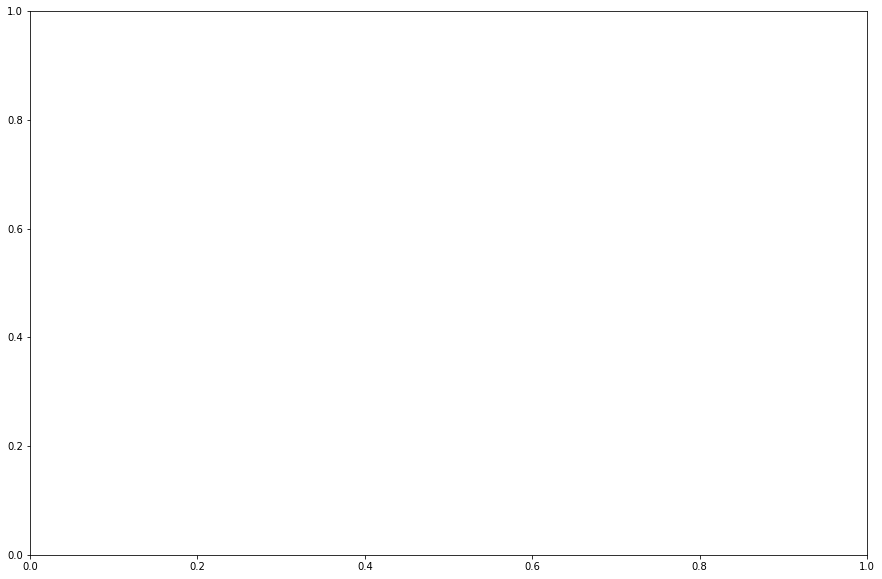

In [256]:
#Creating our visualization
fig,ax= plt.subplots()
fig.set_size_inches(15,10)#Dimensions

In [257]:
#cmap stands for color map
#We save seaborn.diverging_palette to our cmap variable to create a diverging palette
#diverging_palette is a seaborn method to create a diverging palette
#setting the argument as_cmap equal to True tells seaborn we want to use this as color map

cmap=sns.diverging_palette(0,250, as_cmap=True)

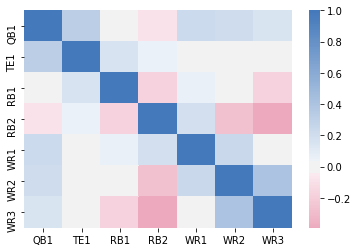

In [258]:
vizCorrMatrix=sns.heatmap(corrMatrix,cmap=cmap, center=0)

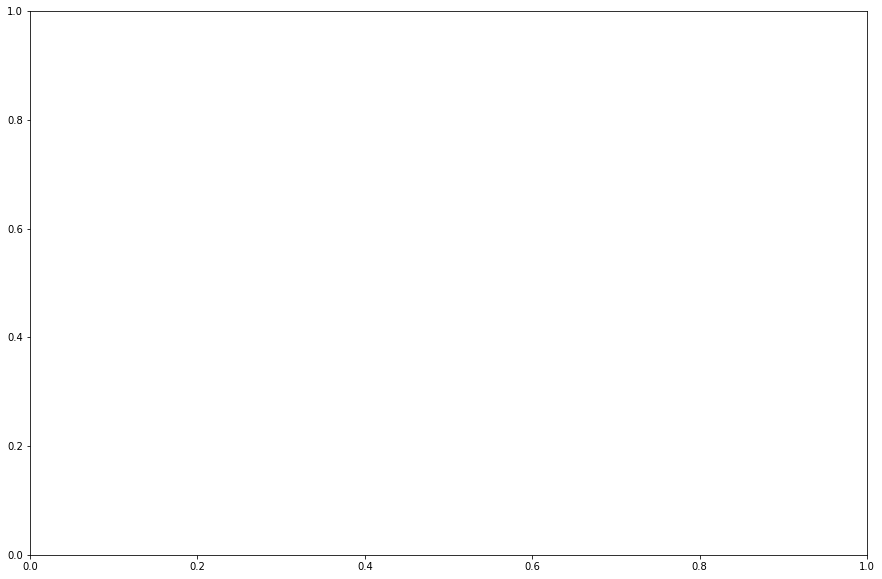

In [259]:
fig, ax= plt.subplots()
fig.set_size_inches(15,10)


In [260]:
mask=np.zeros_like(corrMatrix,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
df.head()

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
Tm,,,,,,,
ARI,17.455000,3.180000,10.884615,6.369231,11.087500,11.087500,6.536364
ATL,17.689333,14.592308,14.114286,5.600000,18.273333,15.000000,6.175000
BAL,27.712000,13.813333,15.900000,5.787500,10.457143,5.943750,3.756250
BUF,17.660000,5.313333,12.325000,5.931250,14.654667,12.053333,4.220000
CAR,13.652308,8.835714,29.325000,1.831250,15.366667,10.731250,3.556250


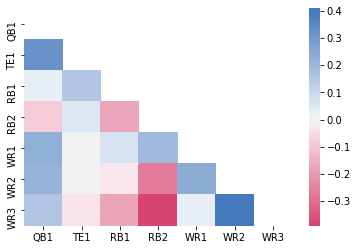

In [261]:
vizCorrMatrix=sns.heatmap(corrMatrix, mask=mask, cmap=cmap, center=0)
#we pass in our correlation matrix, our cmpa, and set center=0 to tell heatmap to start changing colors at 0
#Again, line 79 was basically our final result, this just turns into a heatmap

In [262]:
#How to read heatmap
#For example, to find how WR1 and RB1 numbers are correlated, I would compare by starting with WR1 on y-axis
#Then compare the color to the scale
#A correlation of 1 means perfectly positive correlated and -1 is negative